### Retrieve bike traffic data from all of Germany and extract the relevant bike volumn for a specific city

In [3]:
import os
os.environ['USE_PYGEOS'] = '0'

import pandas as pd
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pathlib import Path
from shapely import wkt
from shapely.geometry import Polygon


ox.log_console = False
ox.use_cache = True

file_name = "verkehrsmengen_2020"
df = pd.read_csv(Path().resolve().parents[3]/"Data"/"Big Data23"/f"{file_name}.csv")

Convert data to Geopandas format

In [ ]:
# create Geopandas Dataframe with coordinates (linstring)
df = df.rename(columns={"edge_geo": "geometry"})
df['geometry'] = df['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df, crs="epsg:4326")
gdf.head()


Choose City

<AxesSubplot: >

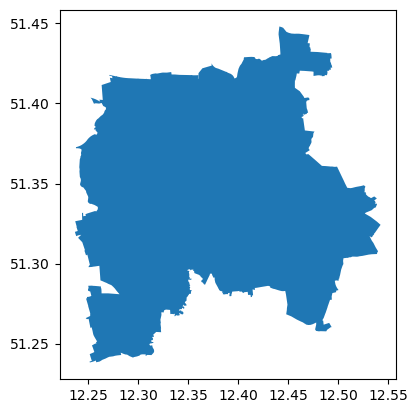

In [10]:
place_name = "Leipzig"
area = ox.geocode_to_gdf(place_name)
area.plot()


Show bike traffic volumn within the choosen city

<AxesSubplot: >

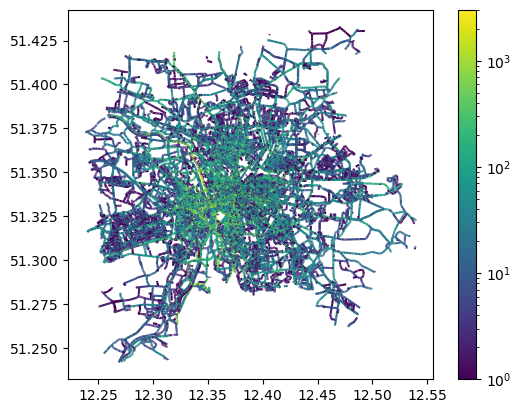

In [11]:
bikes_within_area = gdf.sjoin(area, how="inner", predicate="within")
bikes_within_area.drop("index_right", inplace=True, axis=1)


bikes_within_area.plot(
        column="occurrences",legend=True, 
        norm=colors.LogNorm(vmin=bikes_within_area["occurrences"].min(), 
        vmax=bikes_within_area["occurrences"].max())
)

# print(bikes_within_area.head())

Show bike traffic volumn within the choosen city (only for Hamburg)

In [ ]:
# show bike data within a city
bikes_within_area = gdf.sjoin(area, how="inner", predicate="within")

# for Hamburg
latitude = 53.8 # from north
longitude = 9.5 # from west
box_size = 1

box = Polygon([
        (longitude, latitude),
        (longitude+box_size, latitude),
        (longitude+box_size, latitude-box_size),
        (longitude, latitude-box_size)
])
box_gdf = gpd.GeoDataFrame(crs='epsg:4326', geometry=[box])
bikes_within_area.drop("index_right", inplace=True, axis=1)
bikes_within_area = bikes_within_area.sjoin(box_gdf, how="inner", predicate="within")


bikes_within_area.plot(
        column="occurrences",legend=True, 
        norm=colors.LogNorm(vmin=bikes_within_area["occurrences"].min(), 
        vmax=bikes_within_area["occurrences"].max())
)

# print(bikes_within_area.head())

Save bike traffic data within a city

In [12]:
bikes = bikes_within_area.loc[:, ["geometry", "occurrences"]]
bikes.to_file(Path().resolve()/"data"/f"{place_name}.shp")  

C:\Users\Philippe\AppData\Local\Temp\ipykernel_13728\684712773.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  bikes.to_file(Path().resolve()/"data"/f"{place_name}.shp")


In [ ]:
from numpy import log10
# save bike data within a city
bikes_within_area.explore(log10(bikes_within_area["occurrences"]),legend=True
        )